# Dataset 3: Video Transcoding Time

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
import seaborn as sns
import numpy as np
import math
import shap

%matplotlib inline
#warnings.filterwarnings('ignore')

In [2]:
# Load and explore raw data
df = pd.read_table('transcoding_mesurment.tsv',index_col=False) #df = pd.read_csv('transcoding_mesurment.tsv',index_col=False)

In [3]:
df.shape

(68784, 22)

In [4]:
df.head()

id   duration  codec  width  height  bitrate  framerate   i     p  \
0  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
1  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
2  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
3  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
4  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   

   b  ...  p_size  b_size    size  o_codec  o_bitrate o_framerate  o_width  \
0  0  ...  825054       0  889537    mpeg4      56000        12.0      176   
1  0  ...  825054       0  889537    mpeg4      56000        12.0      320   
2  0  ...  825054       0  889537    mpeg4      56000        12.0      480   
3  0  ...  825054       0  889537    mpeg4      56000        12.0      640   
4  0  ...  825054       0  889537    mpeg4      56000        12.0     1280   

   o_height   umem  utime  
0       144  22508  0.612  
1       240  25164  0.980  
2       360  29228  1.216  
3       480  34316  1.692  
4       720  58528  3.456  

[5 rows x 22 columns]

In [91]:
df_cat = df.select_dtypes(include='object')
df_cat.columns

Index(['id', 'codec', 'o_codec'], dtype='object')

In [5]:
#df.info()
df.describe()

duration         width        height       bitrate     framerate  \
count  68784.000000  68784.000000  68784.000000  6.878400e+04  68784.000000   
mean     286.413921    624.934171    412.572226  6.937015e+05     23.241321   
std      287.257650    463.169069    240.615472  1.095628e+06      7.224848   
min       31.080000    176.000000    144.000000  8.384000e+03      5.705752   
25%      106.765000    320.000000    240.000000  1.343340e+05     15.000000   
50%      239.141660    480.000000    360.000000  2.911500e+05     25.021740   
75%      379.320000    640.000000    480.000000  6.529670e+05     29.000000   
max    25844.086000   1920.000000   1080.000000  7.628466e+06     48.000000   

                  i              p             b         frames        i_size  \
count  68784.000000   68784.000000  68784.000000   68784.000000  6.878400e+04   
mean     100.868312    6531.692210      9.147854    6641.708377  2.838987e+06   
std       84.764791    6075.871744     92.516177    6153.342453  4.325137e+06   
min        7.000000     175.000000      0.000000     192.000000  1.164800e+04   
25%       39.000000    2374.000000      0.000000    2417.000000  3.933950e+05   
50%       80.000000    5515.000000      0.000000    5628.000000  9.458650e+05   
75%      138.000000    9155.000000      0.000000    9232.000000  3.392479e+06   
max     5170.000000  304959.000000   9407.000000  310129.000000  9.082855e+07   

             p_size   b_size          size     o_bitrate   o_framerate  \
count  6.878400e+04  68784.0  6.878400e+04  6.878400e+04  68784.000000   
mean   2.218057e+07      0.0  2.502294e+07  1.395036e+06     21.190862   
std    5.097306e+07      0.0  5.414402e+07  1.749352e+06      6.668703   
min    3.384500e+04      0.0  1.918790e+05  5.600000e+04     12.000000   
25%    1.851539e+06      0.0  2.258222e+06  1.090000e+05     15.000000   
50%    6.166260e+06      0.0  7.881069e+06  5.390000e+05     24.000000   
75%    1.515506e+07      0.0  1.977335e+07  3.000000e+06     25.000000   
max    7.689970e+08      0.0  8.067111e+08  5.000000e+06     29.970000   

            o_width      o_height           umem         utime  
count  68784.000000  68784.000000   68784.000000  68784.000000  
mean     802.336357    503.825541  228224.717900      9.996355  
std      609.959797    315.970438   97430.878373     16.107429  
min      176.000000    144.000000   22508.000000      0.184000  
25%      320.000000    240.000000  216820.000000      2.096000  
50%      480.000000    360.000000  219480.000000      4.408000  
75%     1280.000000    720.000000  219656.000000     10.433000  
max     1920.000000   1080.000000  711824.000000    224.574000

In [6]:
df.b_size.unique()

array([0], dtype=int64)

### 1. Data Inspection

**Q1. Plot a heatmap of Pearson correlation matrix of dataset columns. Report which
features have the highest absolute correlation with the target variable and what
that implies.**

In [77]:
#df_corr = df.loc[:, df.columns != 'b_size'] # remove zero value variable

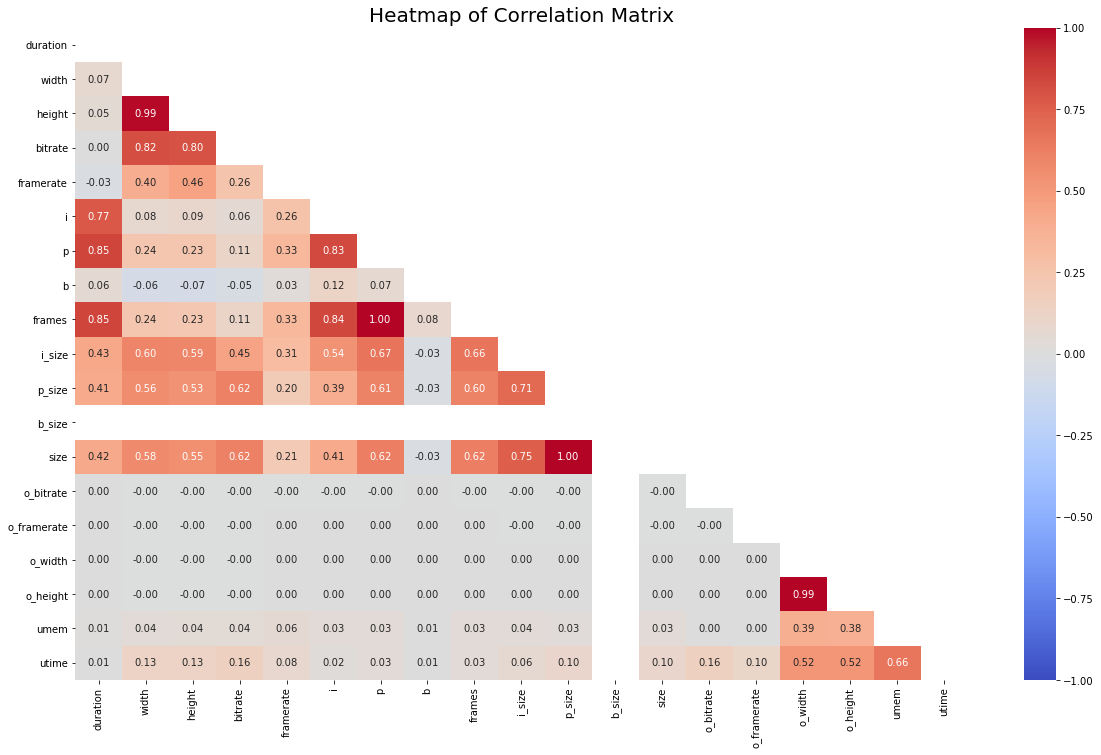

In [8]:
plt.figure(figsize=(20,12))
mask = np.triu(np.ones_like(df.corr(), dtype=bool)) # cut heatmap in half
sns.heatmap(df.corr(), annot = True,fmt='.2f',vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = mask);
plt.title('Heatmap of Correlation Matrix', fontsize=20);
# sns.barplot(x=count_Categories.index, y=count_Categories.values,palette=("Blues_d"))
# plt.ylabel('Number of Training Documents', fontsize=12)
# plt.xlabel('Categories', fontsize=12)
# sns.set_context("poster")

In [9]:
df.corr()['utime'].sort_values(ascending=False)

utime          1.000000
umem           0.663301
o_width        0.523388
o_height       0.519649
o_bitrate      0.155479
bitrate        0.155200
width          0.129861
height         0.128479
o_framerate    0.104043
p_size         0.097644
size           0.097096
framerate      0.079336
i_size         0.064711
p              0.033201
frames         0.033115
i              0.018489
duration       0.005533
b              0.005140
b_size              NaN
Name: utime, dtype: float64

**Q2: Plot the histogram of numerical features. What preprocessing can be done if the
distribution of a feature has high skewness?**

In [10]:
df_numeric = df.select_dtypes(include='number')
#df_numeric.dtypes

In [ ]:
# fig = px.histogram(df_numeric, x="Sentinel")
# fig.show()

In [14]:
# this plots multiple seaborn histograms on different subplots.
# 
def plot_multiple_histograms(df, cols):
    num_plots = len(cols)
    num_cols = math.ceil(np.sqrt(num_plots))
    num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols,figsize=(25,25))
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
            
        if num_rows == 1:
            if num_cols == 1:
                sns.histplot(df[col], kde=True, ax=axs)
            else:
                sns.histplot(df[col], kde=True, ax=axs[j])
        else:
            sns.histplot(df[col], kde=True, ax=axs[i, j])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



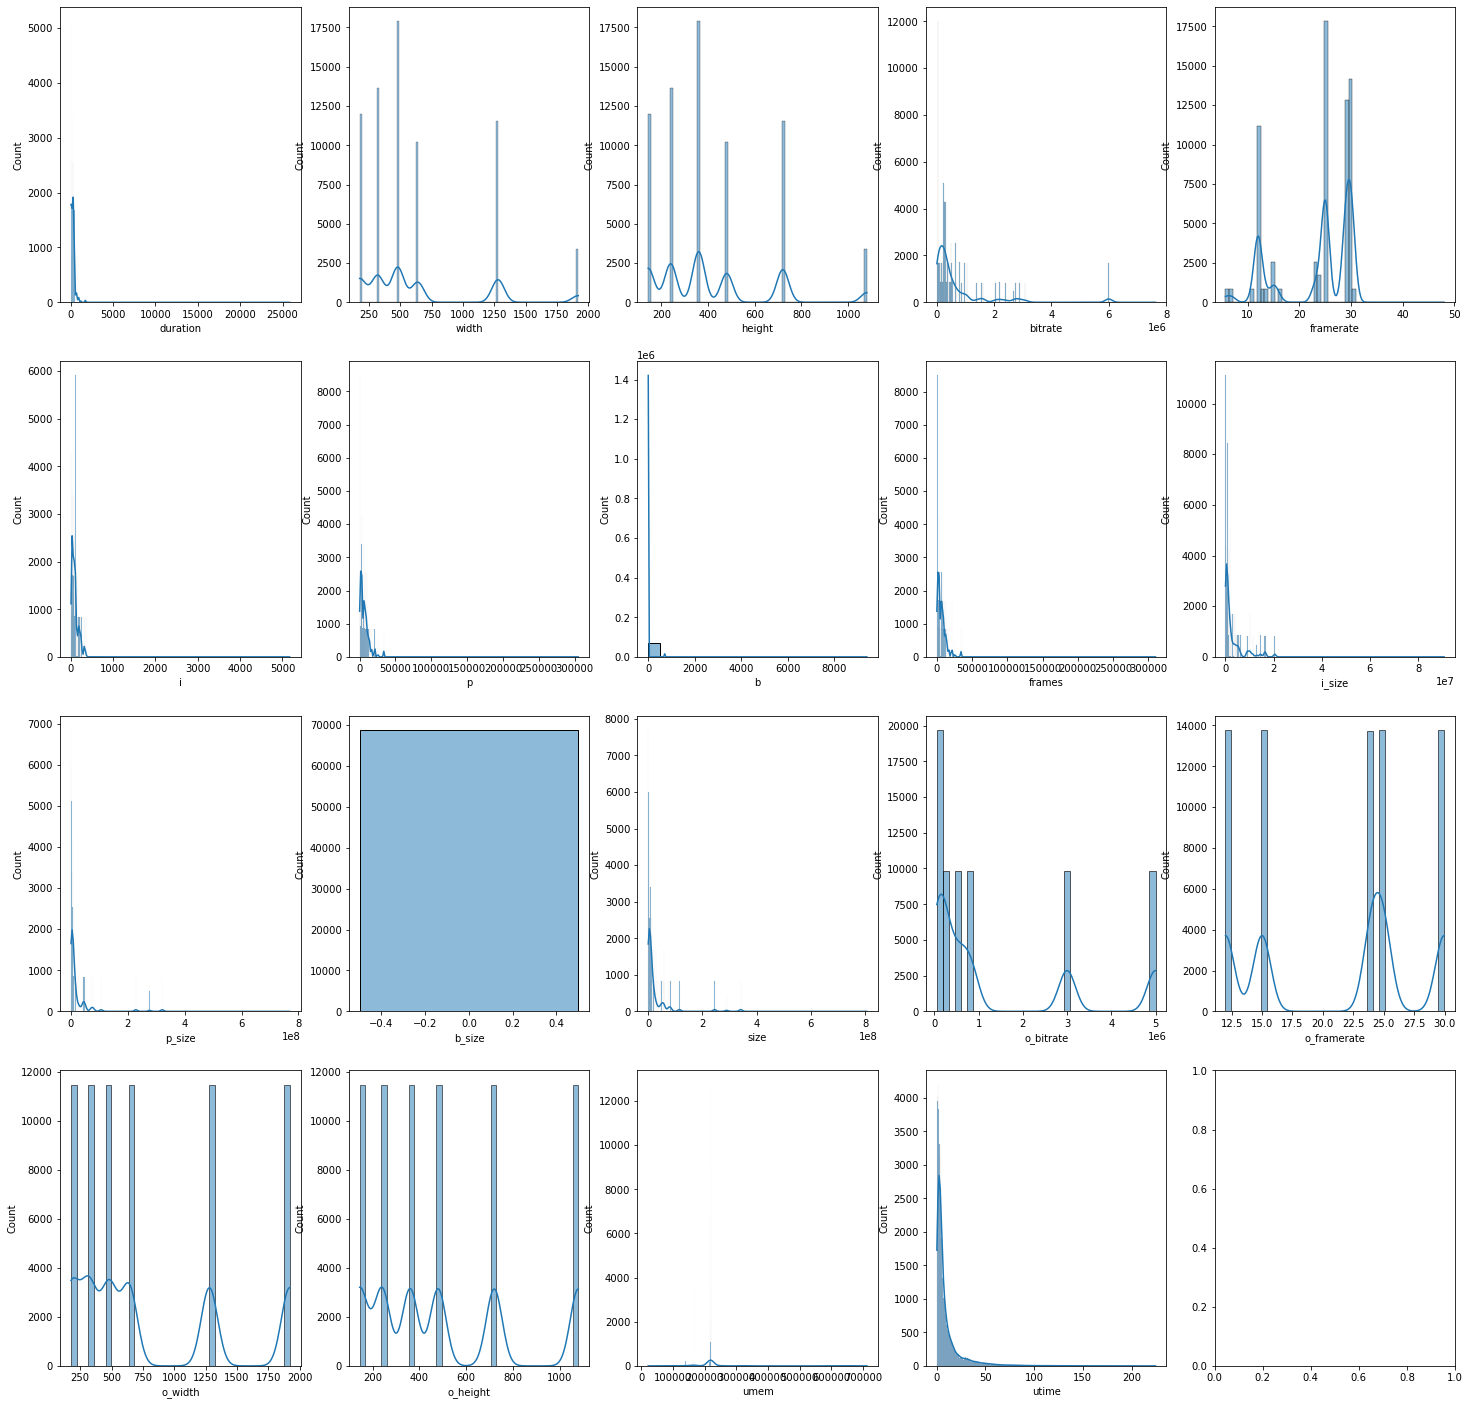

In [15]:
cols = [c for c in df_numeric.columns]
plot_multiple_histograms(df_numeric, cols)

**treatment for data skewness - log and boxcox transform**

In [132]:
df.utime.skew()
utime_log = np.log(df.utime)
utime_log.skew()

0.2144115719961599

In [142]:
a = pd.Series(utime_log, dtype=np.float64, name='log')

In [143]:
utime_bc = stats.boxcox(df.utime)[0]
utime_bc = pd.Series(utime_bc)
#pd.Series(utime_bc).skew()
utime_bc.skew()

0.007659174445552319

In [144]:
b = pd.Series(utime_bc, dtype=np.float64, name='boxcox')

In [145]:
df_transform = pd.merge(a, b, right_index = True,
               left_index = True)

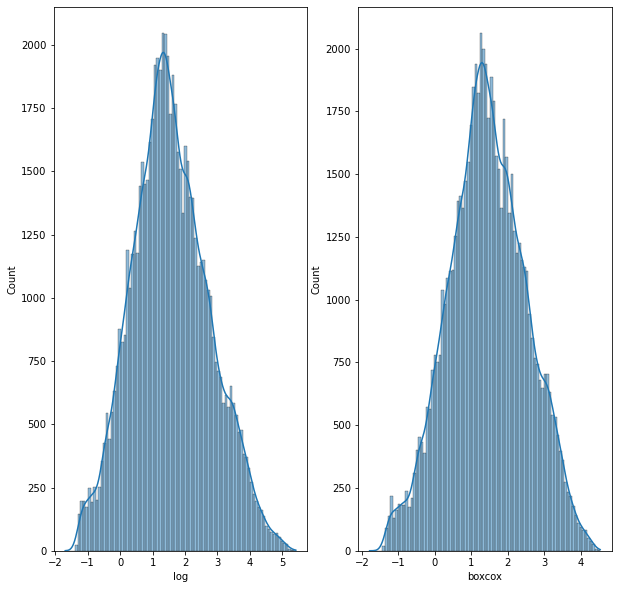

In [154]:
plot_multiple_histograms(df_transform, ['log','boxcox']) # why negative?

**Q3: Inspect box plot of categorical features vs target variable. What intuition do you
get?**

In [202]:
df.select_dtypes(include = [object]).columns

Index(['id', 'codec', 'o_codec'], dtype='object')

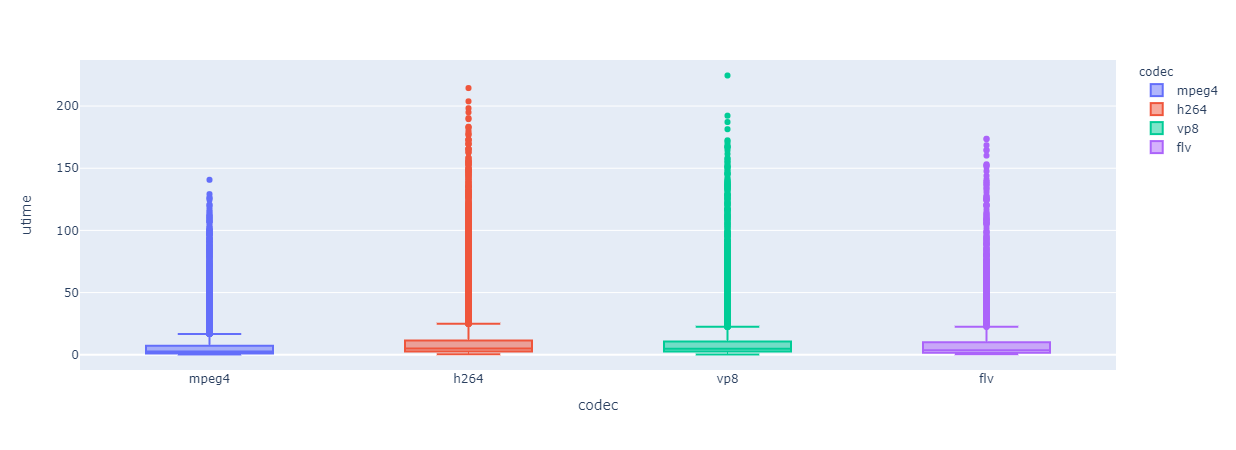

In [187]:
fig = px.box(df, x="codec", y="utime", color="codec")
fig.show()

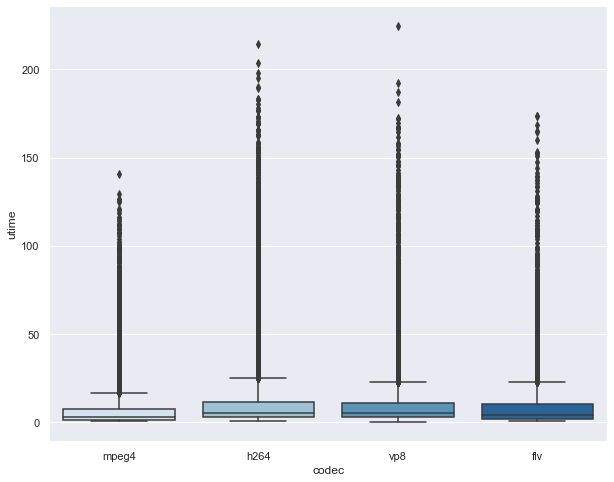

In [201]:
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
sns.boxplot(x=df['codec'], y=df['utime'], palette="Blues")
plt.show()

In [207]:
# app.run_server(mode='inline', host="localhost",port=8051)
# #app.run_server(mode='jupyterlab',port=8052)

**Q6: For video transcoding time dataset, plot the distribution of video transcoding times,
what can you observe? Report mean and median transcoding times.**

In [279]:
# # Density Plot for target video transcoding times
# plt.figure(figsize=(12,8))
# sns.distplot(df['utime'], hist=False, kde=True, 
#              bins=5, color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4});

The mean transcoding time is 9.996
The median transcoding time is 4.408


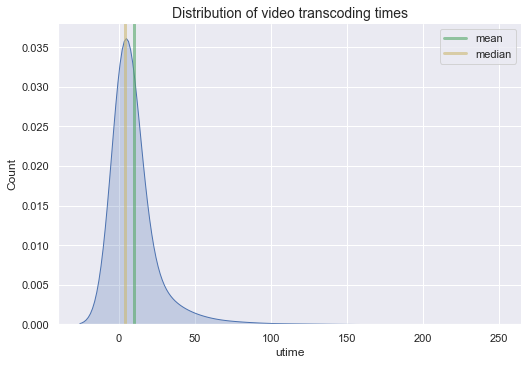

In [278]:
# set the distribution, mean and median
sns.displot(df, x="utime", kind="kde", bw_adjust=5, fill=True, height=5, aspect=1.5)
plt.axvline(x=df["utime"].mean(), linewidth=3, color='g', label="mean", alpha=0.6)
plt.axvline(x=df["utime"].median(), linewidth=3, color='y', label="median", alpha=0.6)

# set title, legends and labels
plt.xlabel("utime")
plt.ylabel("Count")
plt.title("Distribution of video transcoding times", size=14)
plt.legend(["mean", "median"]);

mean = df.utime.mean()
median = df.utime.median()
print("The mean transcoding time is", round(mean,3))
print("The median transcoding time is", round(median,3))

In [ ]:
# # matplotlib histogram
# plt.hist(flights['arr_delay'], color = 'blue', edgecolor = 'black',
#          bins = int(180/5))

# # seaborn histogram
# sns.distplot(flights['arr_delay'], hist=True, kde=False, 
#              bins=int(180/5), color = 'blue',
#              hist_kws={'edgecolor':'black'})
# # Add labels
# plt.title('Histogram of Arrival Delays')
# plt.xlabel('Delay (min)')
# plt.ylabel('Flights')

**Q7: Handling Categorical Features: For some other cases, e.g. when encoding time stamps such as {Mon, ..., Sun} or
{Jan, ..., Dec} it might make sense to perform either one. In those cases the learning
algorithm of choice and numerical results can lead our way. Can you explain a trade-off
here?**

Hint: let us assume we perform linear regression, what information does one-hot
encoding discard, and what assumption should hold strongly if we perform the scalar
encoding instead?
1) prepare categorical data using LabelEncoder() 
2) apply OneHotEncoder() on your new DataFrame in step 1

In [5]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
df['codec'] = labelencoder.fit_transform(df['codec'])
df.head()

id   duration  codec  width  height  bitrate  framerate   i     p  \
0  04t6-jw9czg  130.35667      2    176     144    54590       12.0  27  1537   
1  04t6-jw9czg  130.35667      2    176     144    54590       12.0  27  1537   
2  04t6-jw9czg  130.35667      2    176     144    54590       12.0  27  1537   
3  04t6-jw9czg  130.35667      2    176     144    54590       12.0  27  1537   
4  04t6-jw9czg  130.35667      2    176     144    54590       12.0  27  1537   

   b  ...  p_size  b_size    size  o_codec  o_bitrate o_framerate  o_width  \
0  0  ...  825054       0  889537    mpeg4      56000        12.0      176   
1  0  ...  825054       0  889537    mpeg4      56000        12.0      320   
2  0  ...  825054       0  889537    mpeg4      56000        12.0      480   
3  0  ...  825054       0  889537    mpeg4      56000        12.0      640   
4  0  ...  825054       0  889537    mpeg4      56000        12.0     1280   

   o_height   umem  utime  
0       144  22508  0.612  
1       240  25164  0.980  
2       360  29228  1.216  
3       480  34316  1.692  
4       720  58528  3.456  

[5 rows x 22 columns]

In [6]:
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
encode = OneHotEncoder(handle_unknown='ignore')

# passing codec categorical column
encode_df = pd.DataFrame(encode.fit_transform(df[['codec']]).toarray()) # drop one column? drop: 'first’

# merge with main df on key values
df = df.join(encode_df)

In [7]:
df.head()

id   duration  codec  width  height  bitrate  framerate   i     p  \
0  04t6-jw9czg  130.35667      2    176     144    54590       12.0  27  1537   
1  04t6-jw9czg  130.35667      2    176     144    54590       12.0  27  1537   
2  04t6-jw9czg  130.35667      2    176     144    54590       12.0  27  1537   
3  04t6-jw9czg  130.35667      2    176     144    54590       12.0  27  1537   
4  04t6-jw9czg  130.35667      2    176     144    54590       12.0  27  1537   

   b  ...  o_bitrate  o_framerate  o_width  o_height   umem  utime    0    1  \
0  0  ...      56000         12.0      176       144  22508  0.612  0.0  0.0   
1  0  ...      56000         12.0      320       240  25164  0.980  0.0  0.0   
2  0  ...      56000         12.0      480       360  29228  1.216  0.0  0.0   
3  0  ...      56000         12.0      640       480  34316  1.692  0.0  0.0   
4  0  ...      56000         12.0     1280       720  58528  3.456  0.0  0.0   

     2    3  
0  1.0  0.0  
1  1.0  0.0  
2  1.0  0.0  
3  1.0  0.0  
4  1.0  0.0  

[5 rows x 26 columns]

**Q8: Standardize feature columns and prepare them for training.**

Standardization of datasets is a common requirement for many machine learning estimators; they might behave badly if the individual features do not more-or-less look like
standard normally distributed data: Gaussian with zero mean and unit variance. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly
as expected. (Note: Tree-based models are usually not dependent on scaling.)

In [292]:
# from sklearn.preprocessing import StandardScaler

# # 4 samples/observations and 2 variables/features
# X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
# # the scaler object (model)
# scaler = StandardScaler()
# # fit and transform the data
# scaled_data = scaler.fit_transform(X) 

In [14]:
from sklearn.preprocessing import StandardScaler

# make a copy of dataframe
df_scaled = df.copy()

# Use standard scaler on numerical features
scaler = StandardScaler()
numeric_cols = list(df_scaled.dtypes[df_scaled.dtypes != 'object'].index)
df_scaled.loc[:,numeric_cols] = scaler.fit_transform(df_scaled.loc[:,numeric_cols])

In [20]:
df_scaled.head()
#df_scaled.mean(axis = 0)
#df_scaled.std(axis = 0)

id  duration     codec     width    height   bitrate  framerate  \
0  04t6-jw9czg  -0.54327  0.395869 -0.969273 -1.116197 -0.583333  -1.555936   
1  04t6-jw9czg  -0.54327  0.395869 -0.969273 -1.116197 -0.583333  -1.555936   
2  04t6-jw9czg  -0.54327  0.395869 -0.969273 -1.116197 -0.583333  -1.555936   
3  04t6-jw9czg  -0.54327  0.395869 -0.969273 -1.116197 -0.583333  -1.555936   
4  04t6-jw9czg  -0.54327  0.395869 -0.969273 -1.116197 -0.583333  -1.555936   

          i        p         b  ...  o_bitrate  o_framerate   o_width  \
0 -0.871457 -0.82206 -0.098879  ...  -0.765453    -1.378218 -1.026856   
1 -0.871457 -0.82206 -0.098879  ...  -0.765453    -1.378218 -0.790773   
2 -0.871457 -0.82206 -0.098879  ...  -0.765453    -1.378218 -0.528459   
3 -0.871457 -0.82206 -0.098879  ...  -0.765453    -1.378218 -0.266145   
4 -0.871457 -0.82206 -0.098879  ...  -0.765453    -1.378218  0.783112   

   o_height      umem     utime         0         1         2         3  
0 -1.138803 -2.111427 -0.582615 -0.332299 -0.920378  2.173999 -0.604022  
1 -0.834975 -2.084167 -0.559768 -0.332299 -0.920378  2.173999 -0.604022  
2 -0.455190 -2.042455 -0.545116 -0.332299 -0.920378  2.173999 -0.604022  
3 -0.075405 -1.990233 -0.515564 -0.332299 -0.920378  2.173999 -0.604022  
4  0.684165 -1.741727 -0.406049 -0.332299 -0.920378  2.173999 -0.604022  

[5 rows x 26 columns]

In [21]:
df_scaled.shape

(68784, 26)

### 2. Feature Selection

mutual_info_regression and f_regression

**Q9：You may use these functions to select most important features. How does this step affect
the performance of your models in terms of test RMSE?**

In [22]:
#Divide the features into Independent and Dependent Variable; # drop target variable and categorical variable
X = df_scaled.drop(['utime', 'id', 'o_codec'], axis=1) 
y = df_scaled['utime']

In [64]:
threshold = 10  # the number of most relevant features
high_score_features = []
feature_scores = mutual_info_regression(X, y, random_state=0)

for score, f_name in sorted(zip(feature_scores, X.columns), reverse=True)[:threshold]:
        print(f_name, score)
        high_score_features.append(f_name)
df_MI = X[high_score_features]
print(df_MI.columns)

umem 0.37316143779620337
p 0.32821447643924095
frames 0.32714455884156557
p_size 0.3259465905369261
bitrate 0.32435396655212756
size 0.32410037487785814
i_size 0.3200102663302964
duration 0.3189077610237403
o_width 0.3131130521790748
o_height 0.31202960916935796
Index(['umem', 'p', 'frames', 'p_size', 'bitrate', 'size', 'i_size',
       'duration', 'o_width', 'o_height'],
      dtype='object')


In [65]:
from sklearn.feature_selection import f_regression
threshold = 10 # the number of most relevant features
high_score_features = []
feature_scores = f_regression(X, y)[0]

for score, f_name in sorted(zip(feature_scores, X.columns), reverse=True)[:threshold]:
      print(f_name, score)
      high_score_features.append(f_name)
df_f_regression = X[high_score_features]
print(df_f_regression.columns)

b_size nan
umem 54036.133579215595
o_width 25950.518894509314
o_height 25444.403221856242
o_bitrate 1703.9027851757335
bitrate 1697.6446721200734
width 1179.8295171164473
height 1154.421640320727
o_framerate 752.7024732734636
p_size 662.110205497634
Index(['b_size', 'umem', 'o_width', 'o_height', 'o_bitrate', 'bitrate',
       'width', 'height', 'o_framerate', 'p_size'],
      dtype='object')


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


#### Optional: Correlation Coefficients
Intuitively, highly correlated features with target can be selected. Besides, one of the highly correlated features can be removed with respect to the inference of highly correlated features can behave in a similar manner and there is no need to keep both of them. So, these assumptions bring us two threshold values; eliminate features with low correlation than a threshold with respect to target, and eliminate one of the features which have a correlation value higher than a threshold. 

(Note: we can also combine highly correlated features into a grouped feature.)

In [81]:
df_wine_norm = pd.read_csv('winequality-red.csv',index_col=False)

df_wine_norm_corr Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')


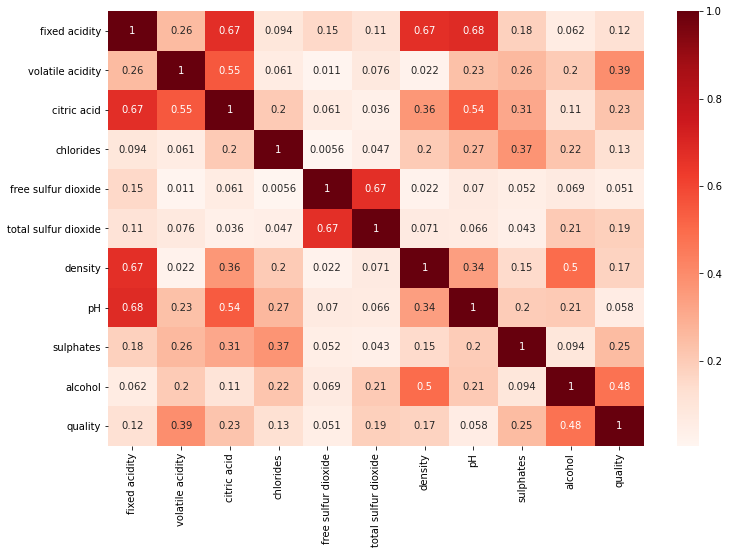

df_wine_norm_corr Index(['fixed acidity', 'volatile acidity', 'chlorides', 'free sulfur dioxide',
       'sulphates', 'alcohol'],
      dtype='object')


In [84]:
corr_with_label = 0.05  # min correlation threshold for target
corr_between_features = 0.65 # max correlation threshold between features

cor = df_wine_norm.corr()
# drop less correlated ones with target
corr_target = abs(cor['quality'])
relevant_features = corr_target[corr_target > corr_with_label]
df_wine_norm_corr = df_wine_norm[list(relevant_features.index)]
print('df_wine_norm_corr', df_wine_norm_corr.columns)

# ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'density', 'alcohol', 'quality']
cor = df_wine_norm_corr.corr().abs()
plt.figure(figsize=(12, 8))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
# drop highly correlated features
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > corr_between_features)]
df_wine_norm_corr = df_wine_norm_corr.drop(df_wine_norm_corr[to_drop], axis=1)
df_wine_norm_corr = df_wine_norm_corr[[cols for cols in df_wine_norm_corr.columns if cols != 'quality']]
print('df_wine_norm_corr', df_wine_norm_corr.columns)
# ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'density']

In [90]:
np.log([100, 1, np.e, np.e**2, 0.01, 0])

<ipython-input-90-2de1cbf718fb>:1: RuntimeWarning: divide by zero encountered in log
  np.log([100, 1, np.e, np.e**2, 0.01, 0])


array([ 4.60517019,  0.        ,  1.        ,  2.        , -4.60517019,
              -inf])

## Training

Once the data is prepared, we would like to **train multiple algorithms and compare their performance using average RMSE from 10-fold cross-validation.**

**Q27: Perform 10-fold cross-validation and measure average RMSE errors for training and validation sets. Why is the training RMSE different from that of validation set?**

**Q28: For random forest model, measure “Out-of-Bag Error” (OOB) as well. Explain what OOB error and R2 score means given this link.**

#### 1. Linear Regression

In [32]:
all_features = list(X_train.select_dtypes(include='number'))

In [31]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X = X_train[all_features].values
y = y_train.values

regressor = LinearRegression()
regressor.fit(X, y)

# Predicting the Test set results
y_pred = regressor.predict(X_test[all_features])
model1 = sm.OLS(y,X)
result = model1.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.651
Model:                            OLS   Adj. R-squared (uncentered):              0.651
Method:                 Least Squares   F-statistic:                              5617.
Date:                Sat, 05 Jun 2021   Prob (F-statistic):                        0.00
Time:                        16:12:31   Log-Likelihood:                     -1.8454e+05
No. Observations:               48148   AIC:                                  3.691e+05
Df Residuals:                   48132   BIC:                                  3.692e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [25]:
# using 10 key features
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X = X_train[key_cols].values
y = y_train.values

regressor = LinearRegression()
regressor.fit(X, y)

# Predicting the Test set results
y_pred = regressor.predict(X_test[key_cols])
model1 = sm.OLS(y,X)
result = model1.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.608
Model:                            OLS   Adj. R-squared (uncentered):              0.608
Method:                 Least Squares   F-statistic:                              7472.
Date:                Sat, 05 Jun 2021   Prob (F-statistic):                        0.00
Time:                        16:06:20   Log-Likelihood:                     -1.8734e+05
No. Observations:               48148   AIC:                                  3.747e+05
Df Residuals:                   48138   BIC:                                  3.748e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [35]:
# intercept value 
regressor.intercept_ 

-26.607311161238222

In [36]:
# coefficients value Beta
regressor.coef_ 

array([ 5.50176797e-04,  8.70219100e-03, -1.56119902e-02,  1.67552762e-06,
        7.75183394e-02, -1.78488844e-03,  3.98779961e-04,  1.01430446e-03,
       -3.71804021e-04, -5.04941331e-07, -3.38432717e-07,  7.28583860e-17,
        3.43994285e-07,  1.41062364e-06,  2.53816537e-01,  5.04112273e-03,
        6.31100602e-03,  8.88143149e-05])

In [39]:
# Visualising the Training set results
# plt.scatter(X, y, color = 'red')
# plt.plot(X_train, regressor.predict(X_test[key_cols]), color = 'blue')

In [ ]:
# Visualising the Test set results
# plt.scatter(X_test, y_test, color = 'red')
# plt.plot(X_train, regressor.predict(X_train), color = 'blue')
# plt.title('Salary vs Experience (Test set)')
# plt.xlabel('Years of Experience')
# plt.ylabel('Salary')
# plt.show()

#### 2. Polynomial Regression

#### 3. Neural Network

#### 4. Random Forest

In [92]:
from sklearn.model_selection import train_test_split
X = df.drop('utime',axis=1) # Independet variable
y = df['utime'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [6]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (48148, 21)
Training Labels Shape: (48148,)
Testing Features Shape: (20636, 21)
Testing Labels Shape: (20636,)


In [7]:
# Saving feature names for later use
feature_list = list(df.columns)
key_cols = ['umem', 'p', 'frames', 'p_size', 'bitrate', 'size', 'i_size','duration', 'o_width', 'o_height'] # from feature importance

**Q21: Fine-tune your model. Explain how these hyper-parameters affect the overall performance? Do some of them have regularization effect?**

In [9]:
#Grid Search Cross Validation for best parameters
from sklearn.model_selection import GridSearchCV

X = X_train[key_cols].values
y = y_train.values

gsc = GridSearchCV(
        estimator=forest1,
        param_grid={
            'max_depth': range(4,5),
            'n_estimators': (10, 50, 100, 200, 500),
        },
        cv=10, scoring='neg_mean_squared_error', verbose=0,  n_jobs=-1)
    
grid_result = gsc.fit(X, y)
best_params = grid_result.best_params_

In [10]:
best_params

{'max_depth': 4, 'n_estimators': 100}

**Q22: Why does random forest perform well?**

**Q23: Randomly pick a tree in your random forest model (with maximum depth of 4) and
plot its structure. Which feature is selected for branching at the root node? What
can you infer about the importance of features? Do the important features match
what you got in part 4.2.1?**

In [8]:
# visualize the random forest
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
import graphviz 

key_cols = ['umem', 'p', 'frames', 'p_size', 'bitrate', 'size', 'i_size','duration', 'o_width', 'o_height'] # from feature importance

forest1 =  RandomForestRegressor(oob_score=True,
                               max_features=10,max_depth=4,
                               random_state=42)

forest1.set_params(n_estimators=100)
X = X_train[key_cols].values
y = y_train.values

forest1.fit(X, y)
tree1 = forest1.estimators_[1] # randomly pick a tree
dot_data = tree.export_graphviz(tree1, out_file=None, feature_names=key_cols, 
                                class_names="utime",   filled=True, rounded=True,  special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('random_forest.png', view=False)

'random_forest.png.pdf'

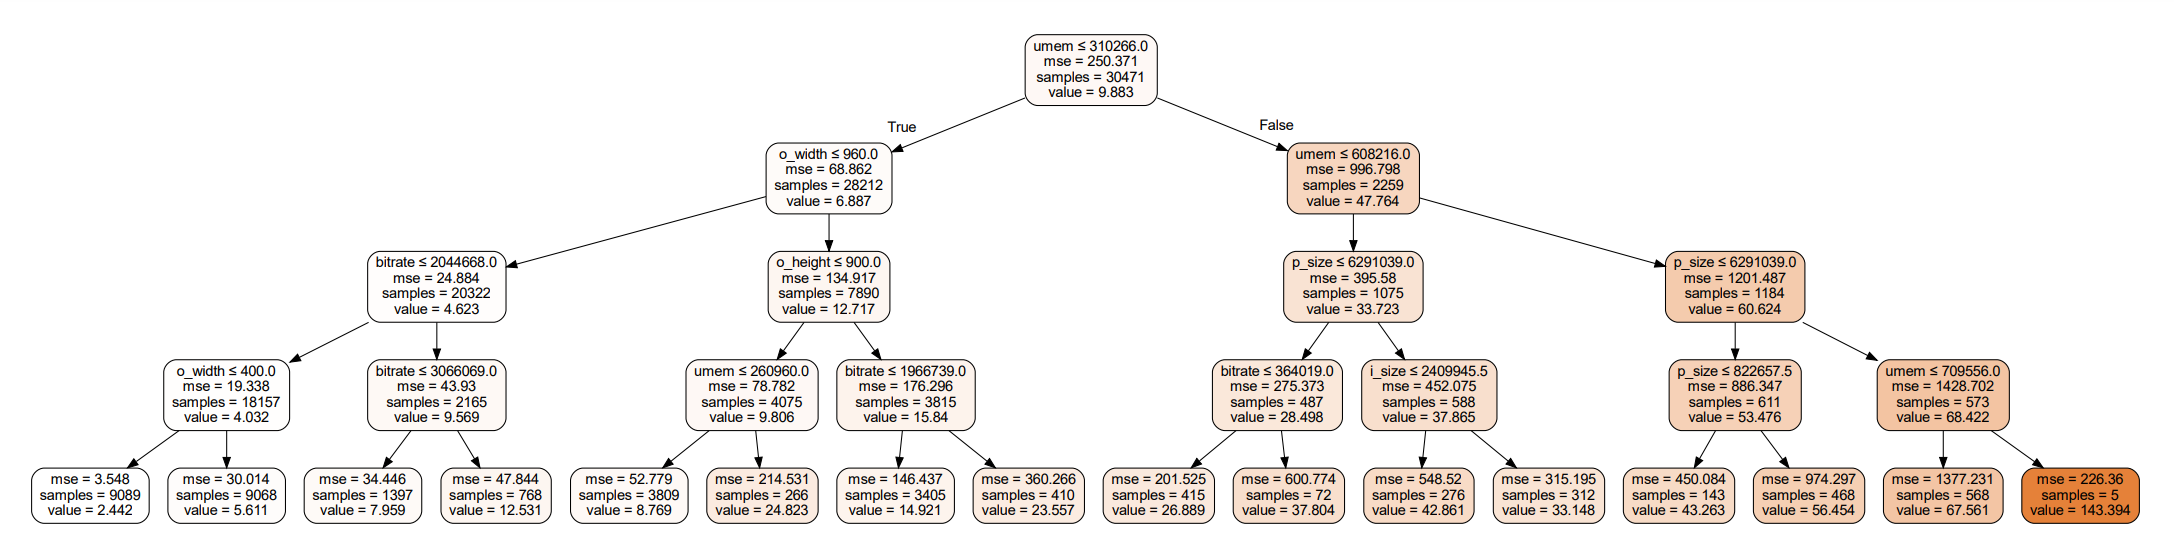

In [12]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(forest1, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise') #using all processors

# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -5.414 (0.078)


In [41]:
# Use the forest's predict method on the test data
y_pred = forest1.predict(X_test[key_cols].values)

# Calculate the absolute errors
errors = abs(y_pred - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'seconds.')

Mean Absolute Error: 5.41 seconds.


#### 5. LightGBM, CatBoost with Bayesian Optimization

In [54]:
import lightgbm as lgb
from sklearn import metrics

In [95]:
from sklearn.model_selection import train_test_split
X = df.drop([['utime','id']],axis=1) # Independet variable
y = df['utime'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [115]:
categorical_features =  np.where(X_train.dtypes == object)[0]
pos = categorical_features
colname = X_train.columns[pos]
print (colname)

Index(['codec', 'o_codec'], dtype='object')


In [159]:
#convert to category dtype
for col in ['codec', 'o_codec']:
    X_train[col] = X_train[col].astype('category')

for col in ['codec', 'o_codec']:
    X_test[col] = X_test[col].astype('category')

<ipython-input-159-4b89dd2237df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].astype('category')
<ipython-input-159-4b89dd2237df>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = X_test[col].astype('category')


In [174]:
import lightgbm as lgb
from sklearn import metrics
#from sklearn.metrics import mean_squared_error

cat_val = ['o_codec', 'codec']

print('Training Start...')
# train
lgbm = lgb.LGBMRegressor(num_leaves=31,
                        learning_rate=0.05,
                        n_estimators=50)
lgbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1', #MAE
        categorical_feature=cat_val,
        early_stopping_rounds=5)

print('Starting predicting...')
# predict
y_pred = lgbm.predict(X_test, num_iteration=lgbm.best_iteration_)
# eval
print('The rmse of prediction is:', metrics.mean_squared_error(y_test, y_pred, squared=False)) #rmse

# feature importances
print('Feature importances:', list(lgbm.feature_importances_))


Training Start...
[1]	valid_0's l1: 9.02532	valid_0's l2: 239.321
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 8.63733	valid_0's l2: 219.28
[3]	valid_0's l1: 8.27446	valid_0's l2: 201.356
[4]	valid_0's l1: 7.92061	valid_0's l2: 184.801
[5]	valid_0's l1: 7.59178	valid_0's l2: 169.988

Using categorical_feature in Dataset.
categorical_feature in Dataset is overridden.
New categorical_feature is ['codec', 'o_codec']
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.



[6]	valid_0's l1: 7.27183	valid_0's l2: 156.541
[7]	valid_0's l1: 6.98089	valid_0's l2: 144.45
[8]	valid_0's l1: 6.69774	valid_0's l2: 133.327
[9]	valid_0's l1: 6.42894	valid_0's l2: 123.22
[10]	valid_0's l1: 6.17285	valid_0's l2: 114.16
[11]	valid_0's l1: 5.9279	valid_0's l2: 105.575
[12]	valid_0's l1: 5.70019	valid_0's l2: 97.8083
[13]	valid_0's l1: 5.48808	valid_0's l2: 90.7979
[14]	valid_0's l1: 5.28051	valid_0's l2: 84.3739
[15]	valid_0's l1: 5.09023	valid_0's l2: 78.5523
[16]	valid_0's l1: 4.90266	valid_0's l2: 73.1274
[17]	valid_0's l1: 4.73348	valid_0's l2: 68.2916
[18]	valid_0's l1: 4.58178	valid_0's l2: 63.8812
[19]	valid_0's l1: 4.42813	valid_0's l2: 59.833
[20]	valid_0's l1: 4.28065	valid_0's l2: 56.1275
[21]	valid_0's l1: 4.14086	valid_0's l2: 52.7562
[22]	valid_0's l1: 4.01322	valid_0's l2: 49.6213
[23]	valid_0's l1: 3.89331	valid_0's l2: 46.757
[24]	valid_0's l1: 3.77497	valid_0's l2: 44.0958
[25]	valid_0's l1: 3.66408	valid_0's l2: 41.7651
[26]	valid_0's l1: 3.56099	va

**Q24: Read the documentation of LightGBM and CatBoost and experiment on the picked
dataset to determined the important hyperparameters along with a proper search
space for the tuning of these parameters.**

In [ ]:
# self-defined eval metric
# f(y_true: array, y_pred: array) -> name: string, eval_result: float, is_higher_better: bool
# Root Mean Squared Logarithmic Error (RMSLE)
# def rmsle(y_true, y_pred):
#     return 'RMSLE', np.sqrt(np.mean(np.power(np.log1p(y_pred) - np.log1p(y_true), 2))), False


# print('Starting training with custom eval function...')
# # train
# lgbm.fit(X_train, y_train,
#         eval_set=[(X_test, y_test)],
#         eval_metric=rmsle,
#         early_stopping_rounds=5)


# # another self-defined eval metric
# # f(y_true: array, y_pred: array) -> name: string, eval_result: float, is_higher_better: bool
# # Relative Absolute Error (RAE)
# def rae(y_true, y_pred):
#     return 'RAE', np.sum(np.abs(y_pred - y_true)) / np.sum(np.abs(np.mean(y_true) - y_true)), False


# print('Starting training with multiple custom eval functions...')
# # train
# lgbm.fit(X_train, y_train,
#         eval_set=[(X_test, y_test)],
#         eval_metric=[rmsle, rae],
#         early_stopping_rounds=5)

# print('Starting predicting...')
# # predict
# y_pred = lgbm.predict(X_test, num_iteration=gbm.best_iteration_)
# # eval
# print('The rmsle of prediction is:', rmsle(y_test, y_pred)[1])
# print('The rae of prediction is:', rae(y_test, y_pred)[1])

# # other scikit-learn modules
# estimator = lgb.LGBMRegressor(num_leaves=31)

# param_grid = {
#     'learning_rate': [0.01, 0.1, 1],
#     'n_estimators': [20, 40]
# }

# lgbm = GridSearchCV(estimator, param_grid, cv=3)
# lgbm.fit(X_train, y_train)

# print('Best parameters found by grid search are:', lgbm.best_params_)

In [81]:
# plt.figure(figsize=(15,15))
# sns.jointplot(y_test, y_pred, kind="reg");

**Q25: Apply Bayesian optimization using skopt.BayesSearchCV from scikit-optmize
to search good hyperparameter combinations in your search space. Report the best
hyperparameter found and the corresponding RMSE, for both algorithms.**

**Q26: Interpret the effect of the hyperparameters using the Bayesian optimization results: Which of them helps with performance? Which helps with regularization (shrinks
the generalization gap)? Which affects the fitting efficiency? Endorse your interpretation with numbers and visualizations.**

### Evaluation

**Q27: Perform 10-fold cross-validation and measure average RMSE errors for training and validation sets. Why is the training RMSE different from that of validation set?**

**Q28: For random forest model, measure “Out-of-Bag Error” (OOB) as well. Explain what OOB error and R2 score means.**

In [192]:
# # compute SHAP values
# explainer = shap.TreeExplainer(lgbm)
# shap_values = explainer.shap_values(X_train)

shap_values = shap.TreeExplainer(lgbm).shap_values(X_train)

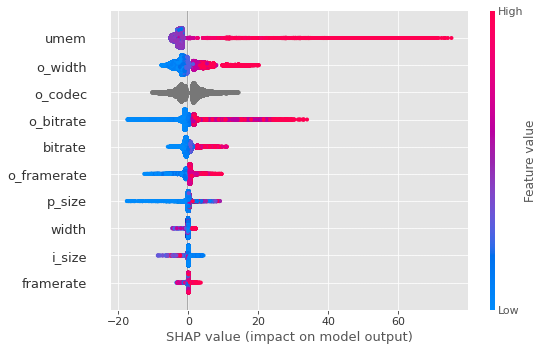

In [193]:
shap.summary_plot(shap_values, X_train, max_display=10)

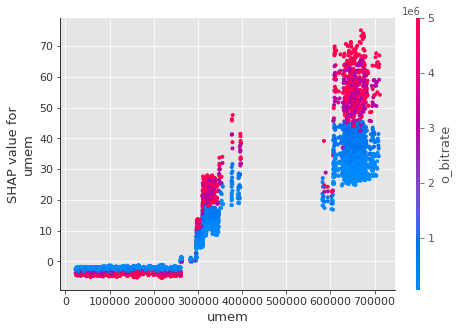

In [194]:
shap.dependence_plot("umem", shap_values, X_train) #, alpha=0.5

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


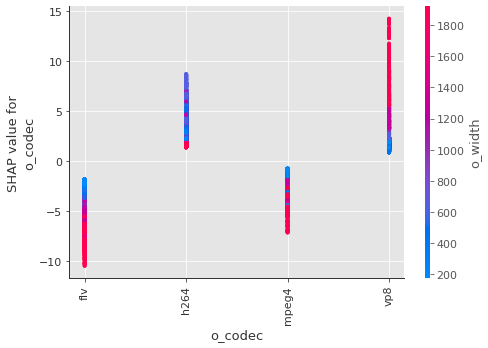

In [195]:
shap.dependence_plot("o_codec", shap_values, X_train)

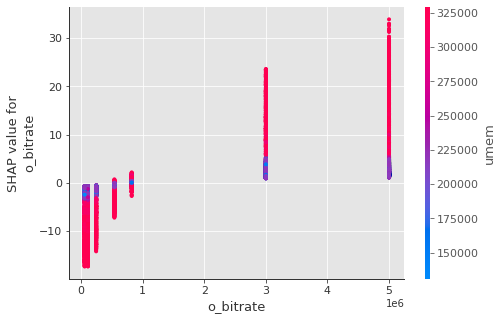

In [196]:
shap.dependence_plot("o_bitrate", shap_values, X_train)

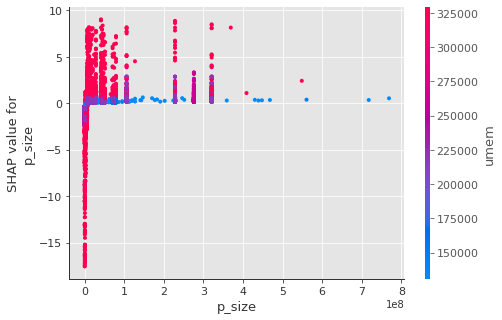

In [197]:
shap.dependence_plot("p_size", shap_values, X_train)

In [ ]:
# summarizing the fit of the model
# print(); print(metrics.r2_score(y_test, y_pred))
# print(); print(metrics.explained_variance_score(y_test, y_pred))
# print(); print(metrics.mean_absolute_error(y_test, y_pred))
# print(); print(metrics.mean_squared_error(y_test, y_pred, squared=False))
# #print(); print(metrics.mean_tweedie_deviance(y_test, y_pred))

# plt.figure(figsize=(8,8))
# sns.regplot(y_test, y_pred, data = df, x_jitter=.5, fit_reg=True, ci=95);